In [1]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
rabifreq = 605e3
rabifreq = 5467810.971651273

print('pi/2 ', np.pi/(2*rabifreq))
print('pi ', np.pi/(rabifreq))

pi/2  2.8728065672696763e-07
pi  5.745613134539353e-07


In [3]:
period = 576.0

print('pi/2 ', period/4)
print('3pi/2 ', 3*period/4)

print('pi ', period/2)

pi/2  144.0
3pi/2  432.0
pi  288.0


In [4]:
1/551.0e-9*1e-6

1.8148820326678765

In [91]:
file = r'D:\data\QudiData\2019\12\20191205\PulsedMeasurement\20191205-1734-46_poi_175319_ramsey 2.3 pi2 readout_pulsed_measurement.dat'
t = ''
f = open(file,'r')
t = f.read()
f.close()


In [92]:
names = ['time','signal','aa','bb']
df= pd.read_csv(file,skiprows = 18, delimiter= '\t',names = names)
del df['aa']
del df['bb']
df.head()

           time   signal
0  5.000000e-08  118.694
1  5.500000e-08  118.510
2  6.000000e-08  118.290
3  6.500000e-08  118.312
4  7.000000e-08  119.284

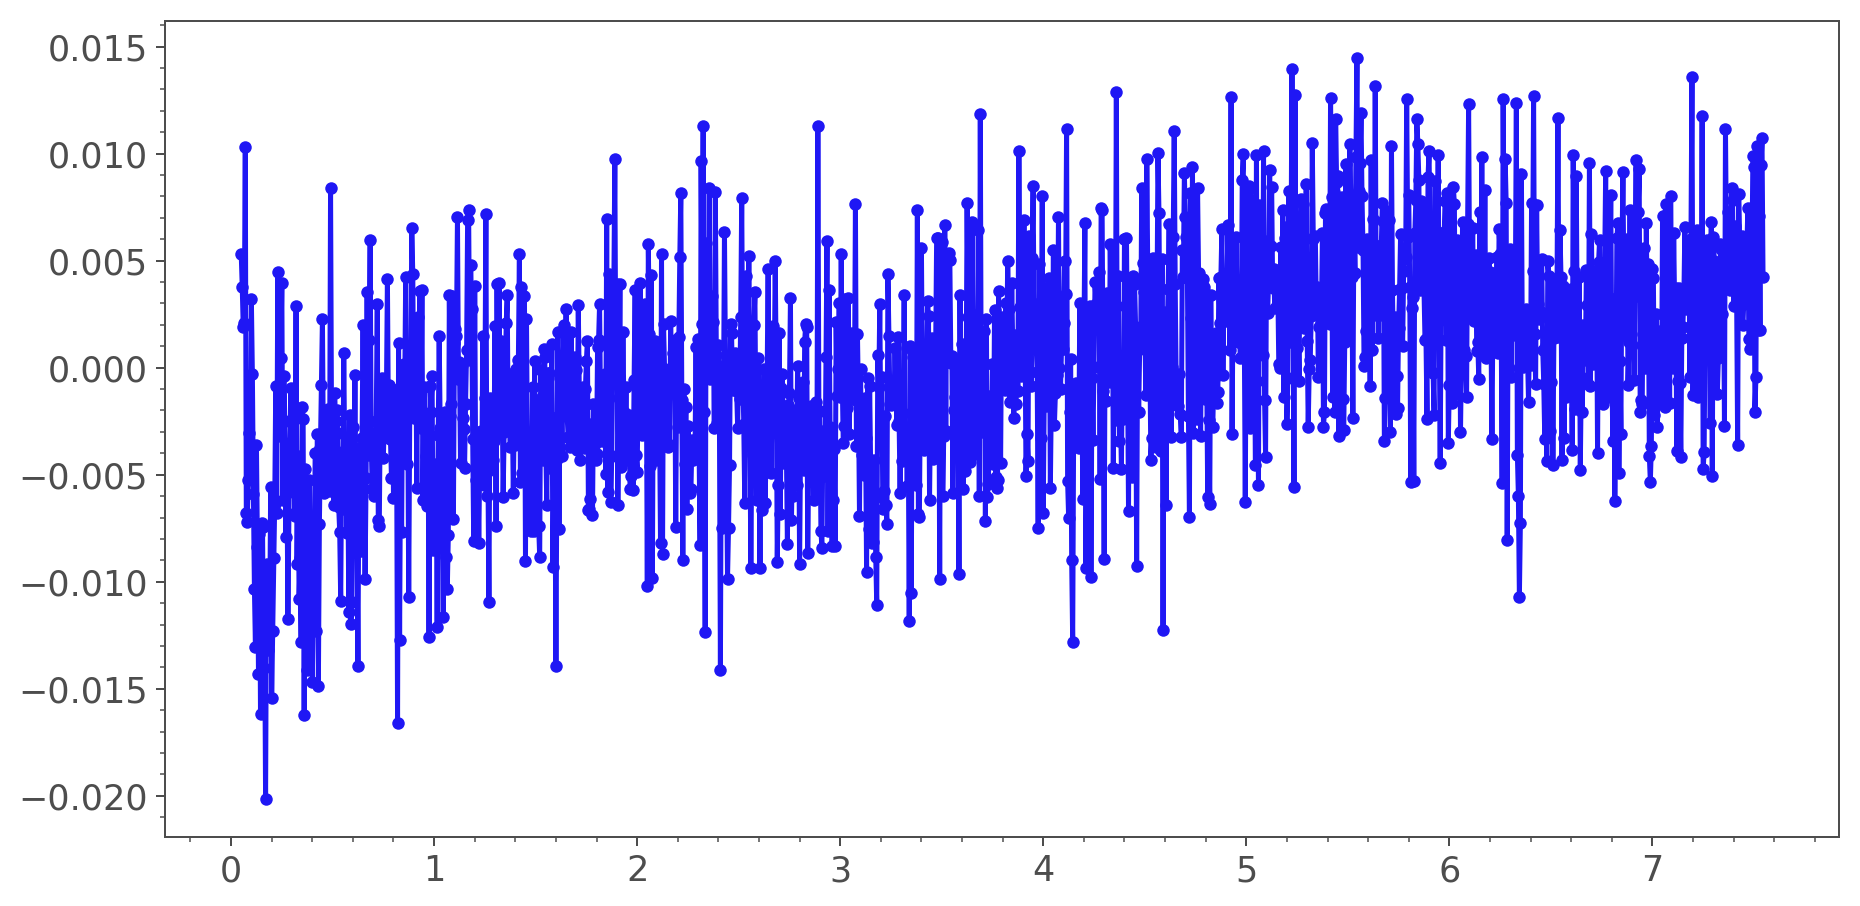

In [93]:
xdata1,ydata1 = df['time'],df['signal']
ydata1=(ydata1-np.mean(ydata1))/np.mean(ydata1)
plt.plot(xdata1*1e6,ydata1)
plt.show()

In [94]:
x1 =[]
y1=[]
for i in range(len(xdata1.values)):
    if xdata1[i]<15.1e-6:
        x1.append(xdata1[i]*1e6)
        y1.append(ydata1[i])
x1=np.array(x1)
y1=np.array(y1)

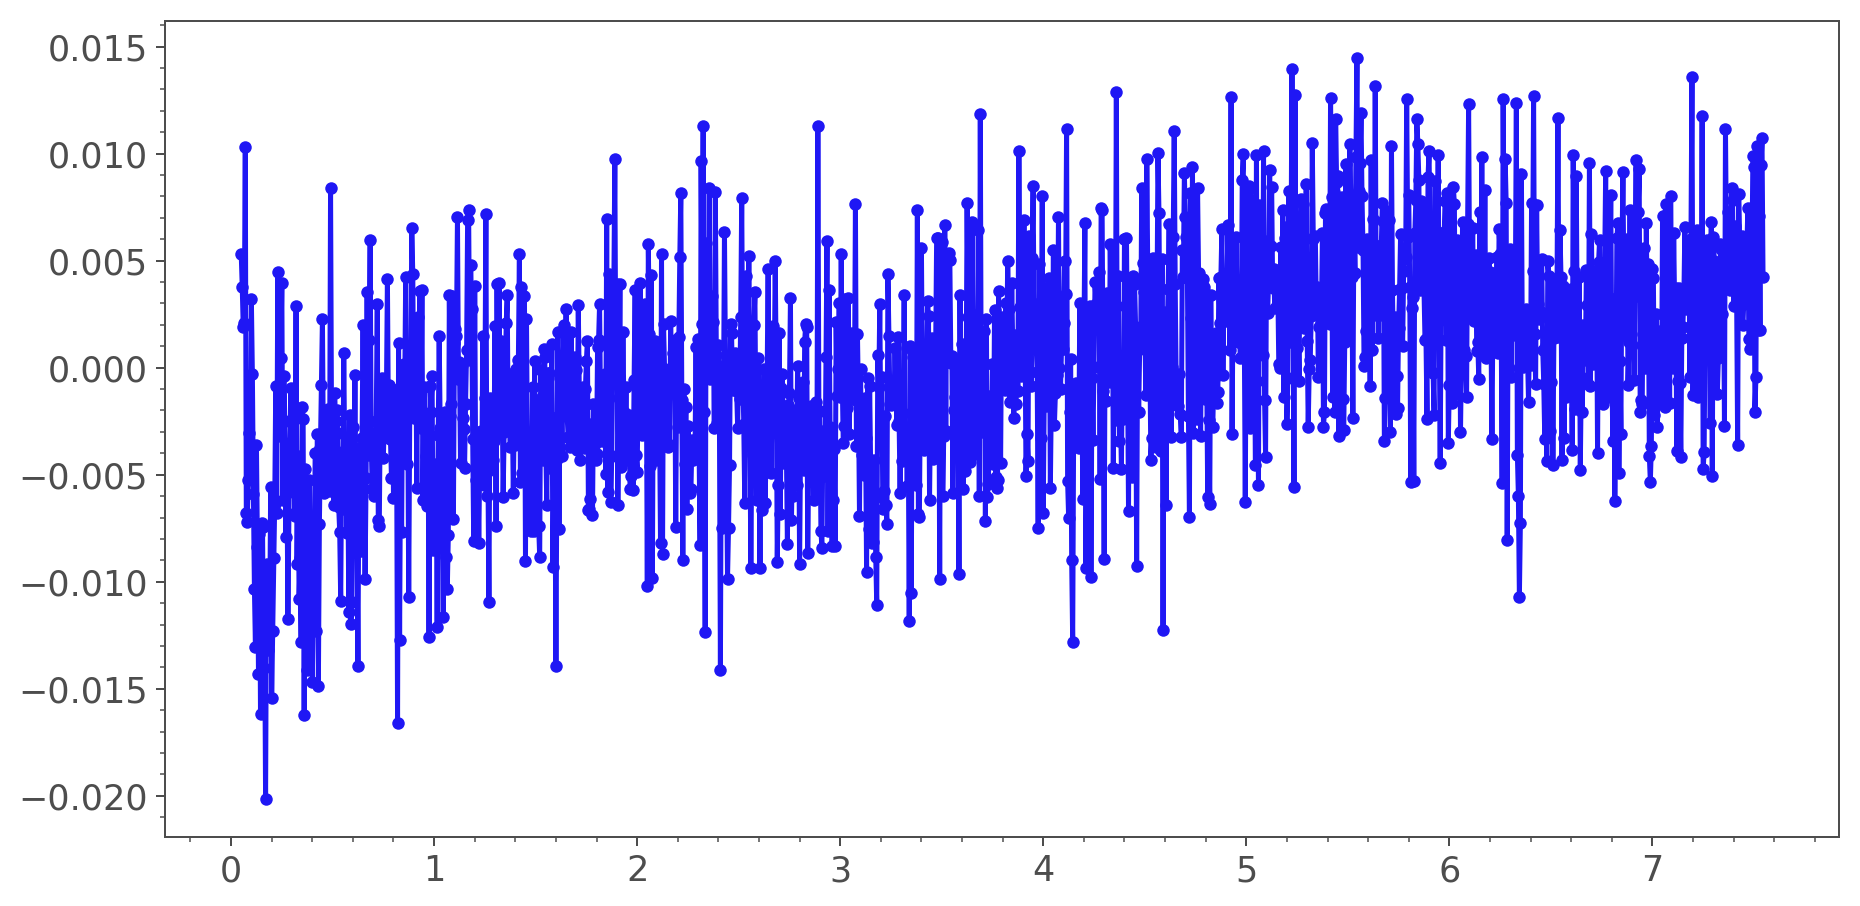

In [95]:
plt.plot(x1,y1)
plt.show()

In [96]:
file = r'D:\data\QudiData\2019\12\20191205\PulsedMeasurement\20191205-1955-50_poi_175319_ramsey 2.3 3pi2 readout_pulsed_measurement.dat'
t = ''
f = open(file,'r')
t = f.read()
f.close()


In [97]:
names = ['time','signal','aa','bb']
df= pd.read_csv(file,skiprows = 18, delimiter= '\t',names = names)
del df['aa']
del df['bb']
df.head()

           time  signal
0  5.000000e-08  99.444
1  5.500000e-08  99.646
2  6.000000e-08  98.567
3  6.500000e-08  99.699
4  7.000000e-08  98.801

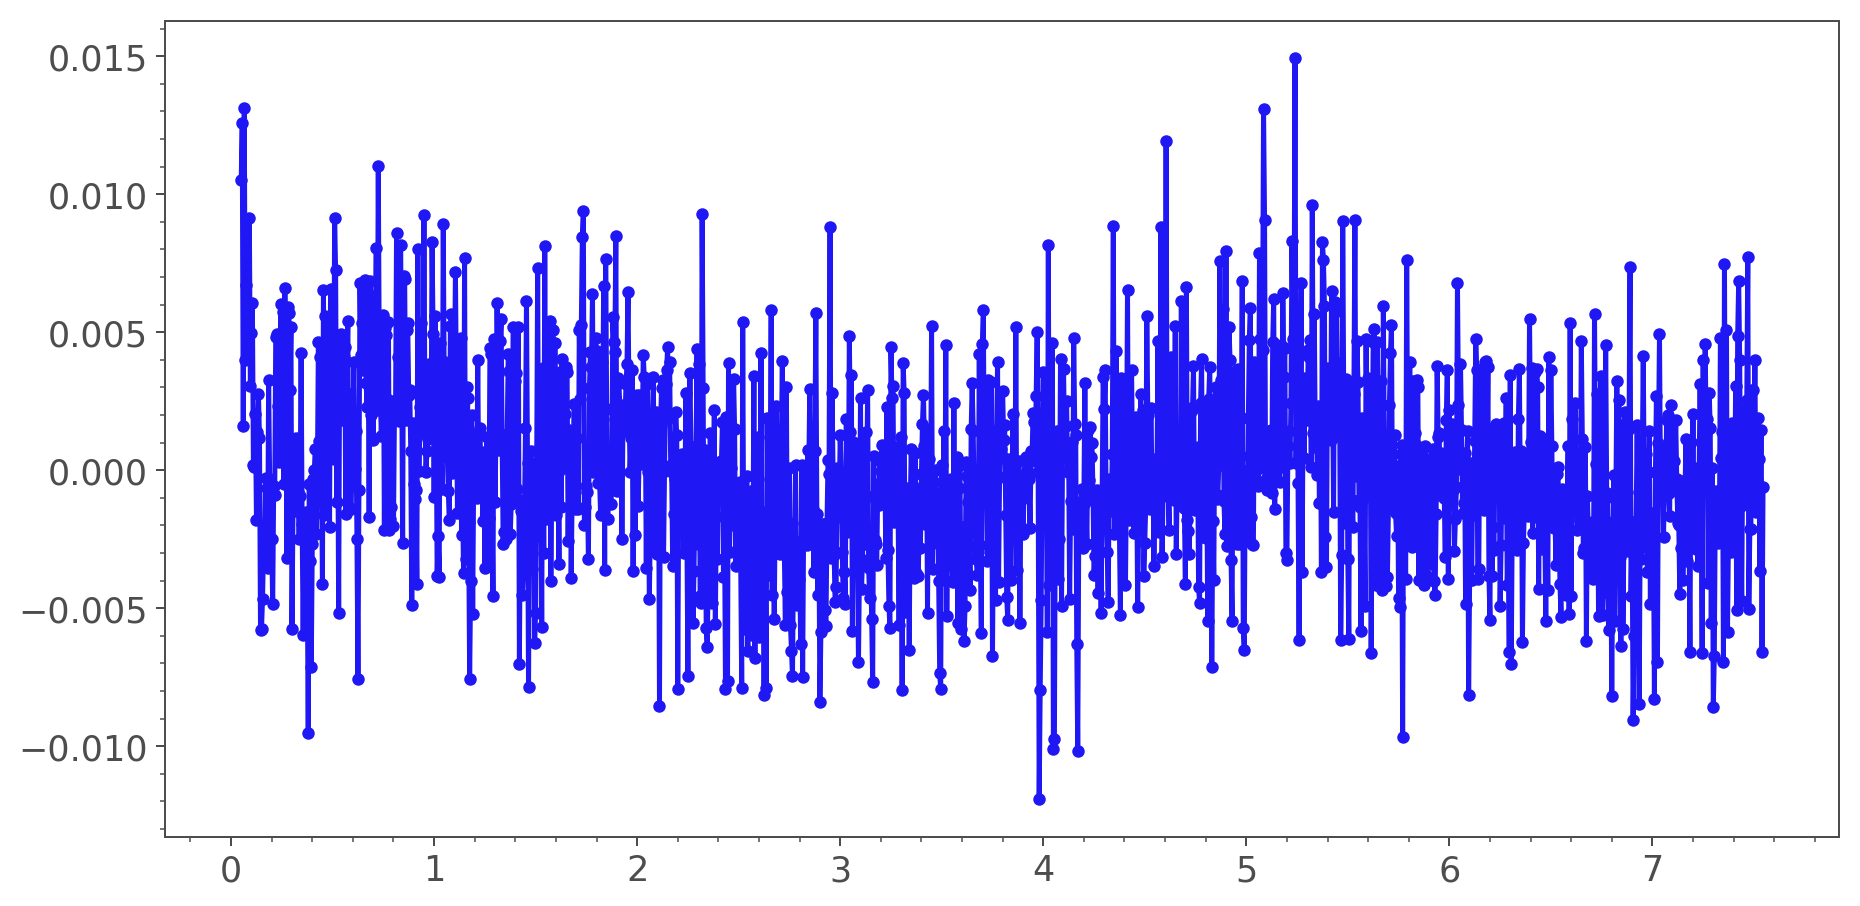

In [98]:
xdata2,ydata2 = df['time'],df['signal']
ydata2=(ydata2-np.mean(ydata2))/np.mean(ydata2)
plt.plot(xdata2*1e6,ydata2)
plt.show()

In [99]:
x2 =[]
y2=[]
for i in range(len(xdata2.values)):
    if xdata2[i]<15.1e-6:
        x2.append(xdata2[i]*1e6)
        y2.append(ydata2[i])
x2=np.array(x2)
y2=np.array(y2)

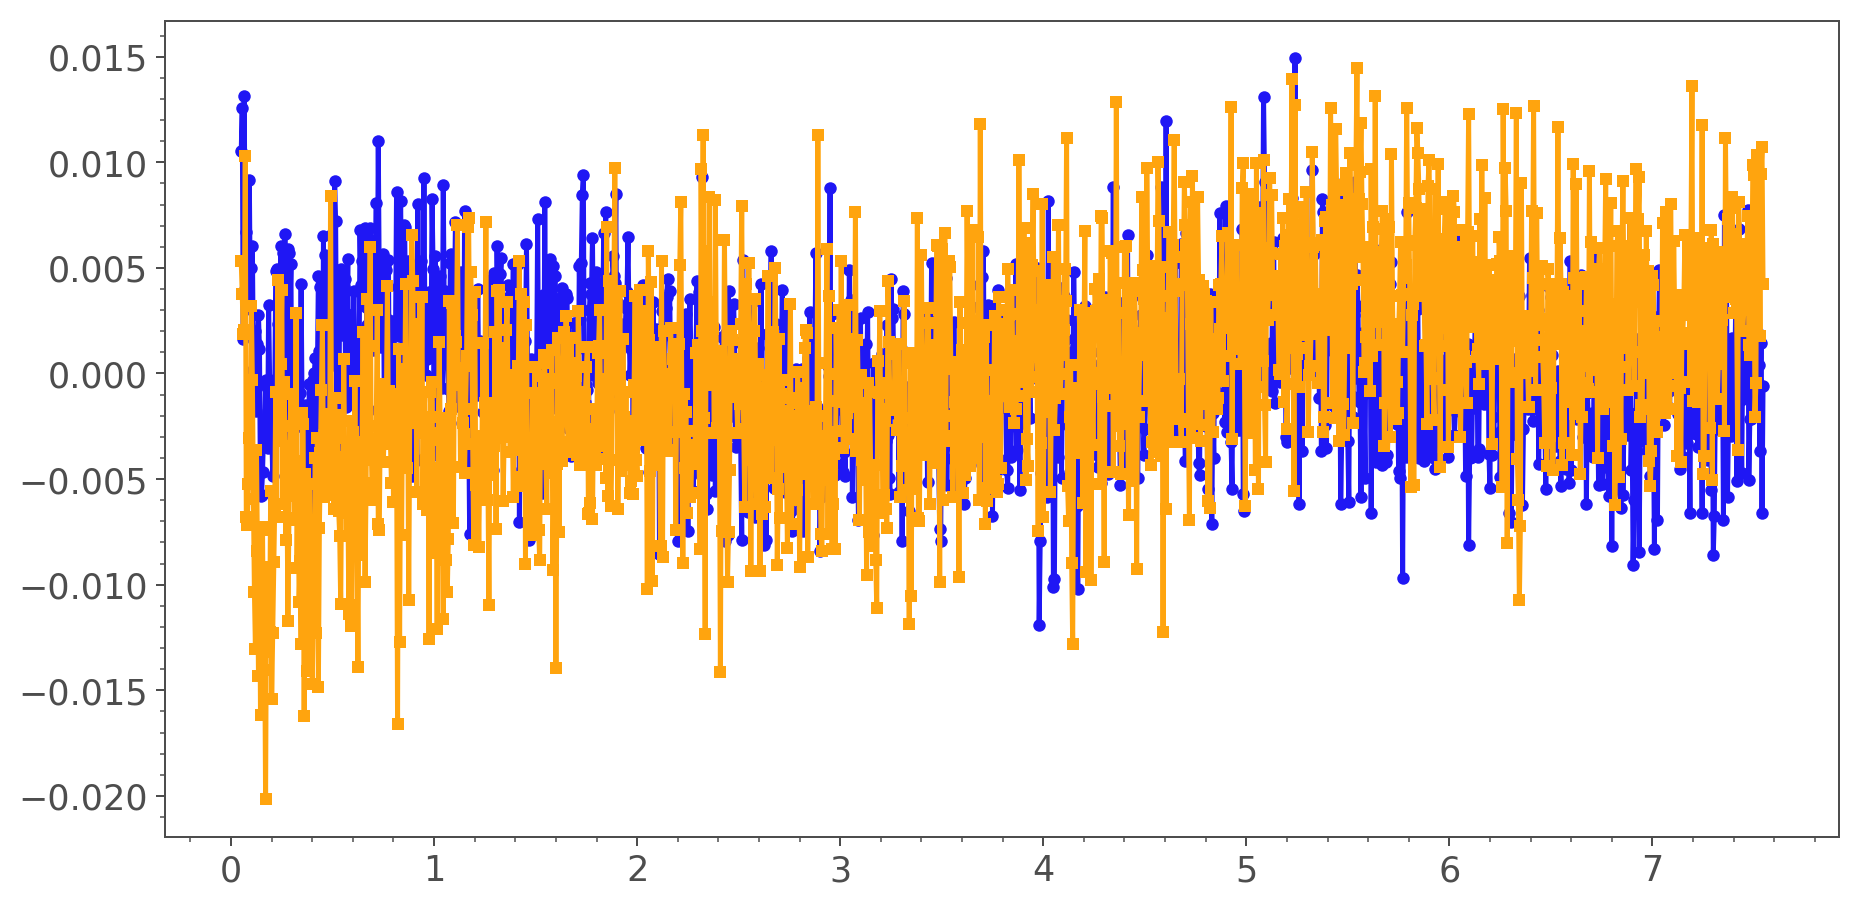

In [102]:
plt.plot(x2,y2)
plt.plot(x1,y1)

plt.show()

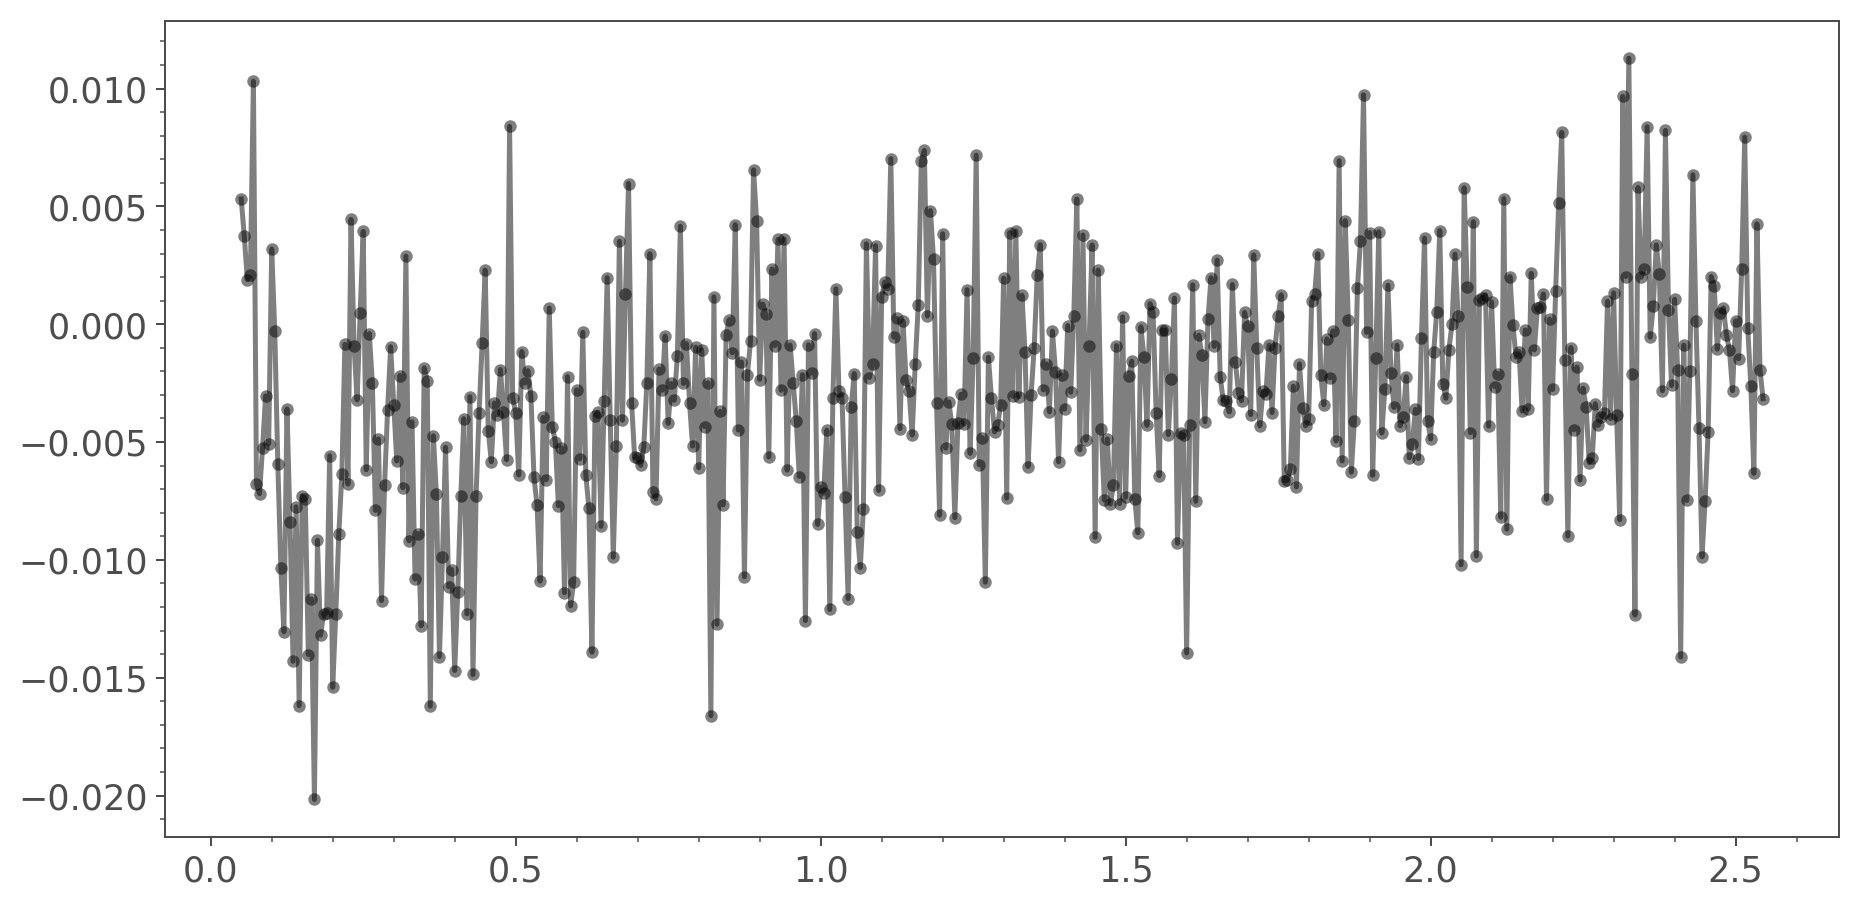

In [121]:
n=500

plt.plot(x1[0:n],y1[0:n],alpha = 0.5, color = 'black')
# plt.plot(x2[0:n],y2[0:n],alpha = 0.5, color = 'grey')
# plt.plot(x1[0:n],y2[0:n]+y1[0:n],color = 'red')

plt.show()

In [197]:
def fit_func (x,a,b,ph,c,t,m):
    return a * np.sin(b * x+ph)*np.exp(-(x/t)) + c

# def fit_func (x,a,c,t,m):
#     return a * np.exp(-(x/t)**m) + c

[ 3.46442148e-04  5.17794550e+01 -2.09769137e+00 -2.57241865e-03
  1.05598996e+04  1.20000000e+00]


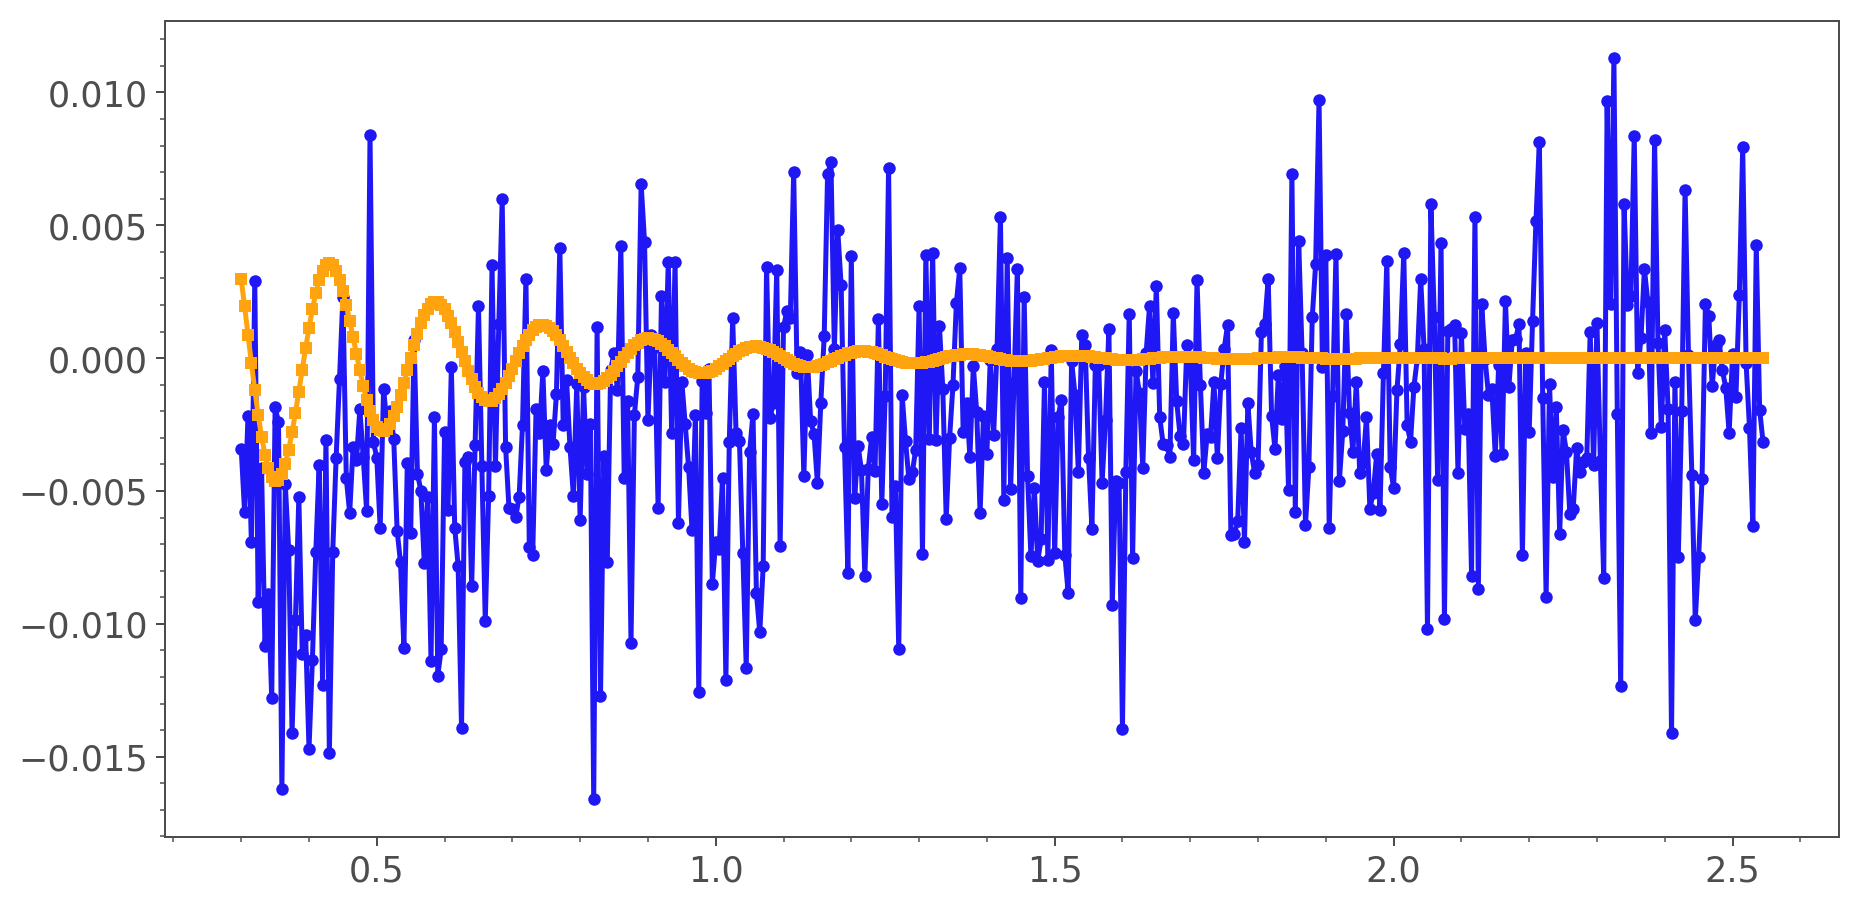

In [204]:
# bounds = ([0,-0.5,0],[10,0.5,10])

# p0=[-0.005,50,0,0,1,1.2]
# p0=[-0.2,0,0.5,4]
# x=x[::2]
# y=y[::2]
n=500
l=50
params, params_covariance = optimize.curve_fit(fit_func, x1[l:n], y1[l:n],p0=[-0.015,50,0,0,1,1.2],maxfev =20000)#,bounds = bounds)
print(params)
plt.plot(x1[l:n],y1[l:n])
# plt.plot(x1[l:n],fit_func(x1[l:n], *params))
plt.plot(x1[l:n],-fit_func(x1[l:n],-0.015,40,np.pi,0,0.3,1.2))


plt.show()

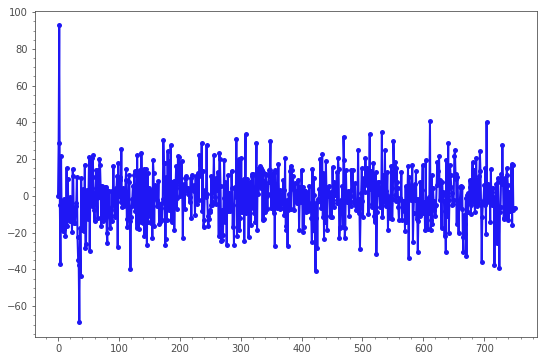

In [28]:
plt.plot(np.fft.rfft(-y))
plt.show()

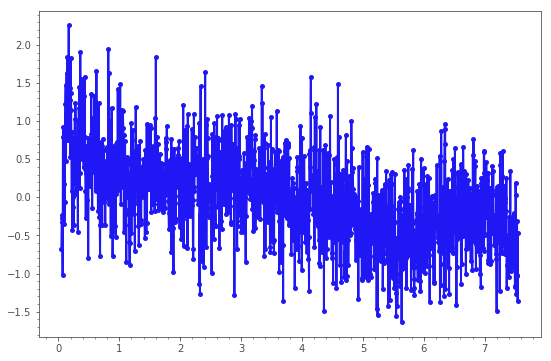

In [35]:
n=1
plt.plot(x[::n],-y[::n])

plt.show()

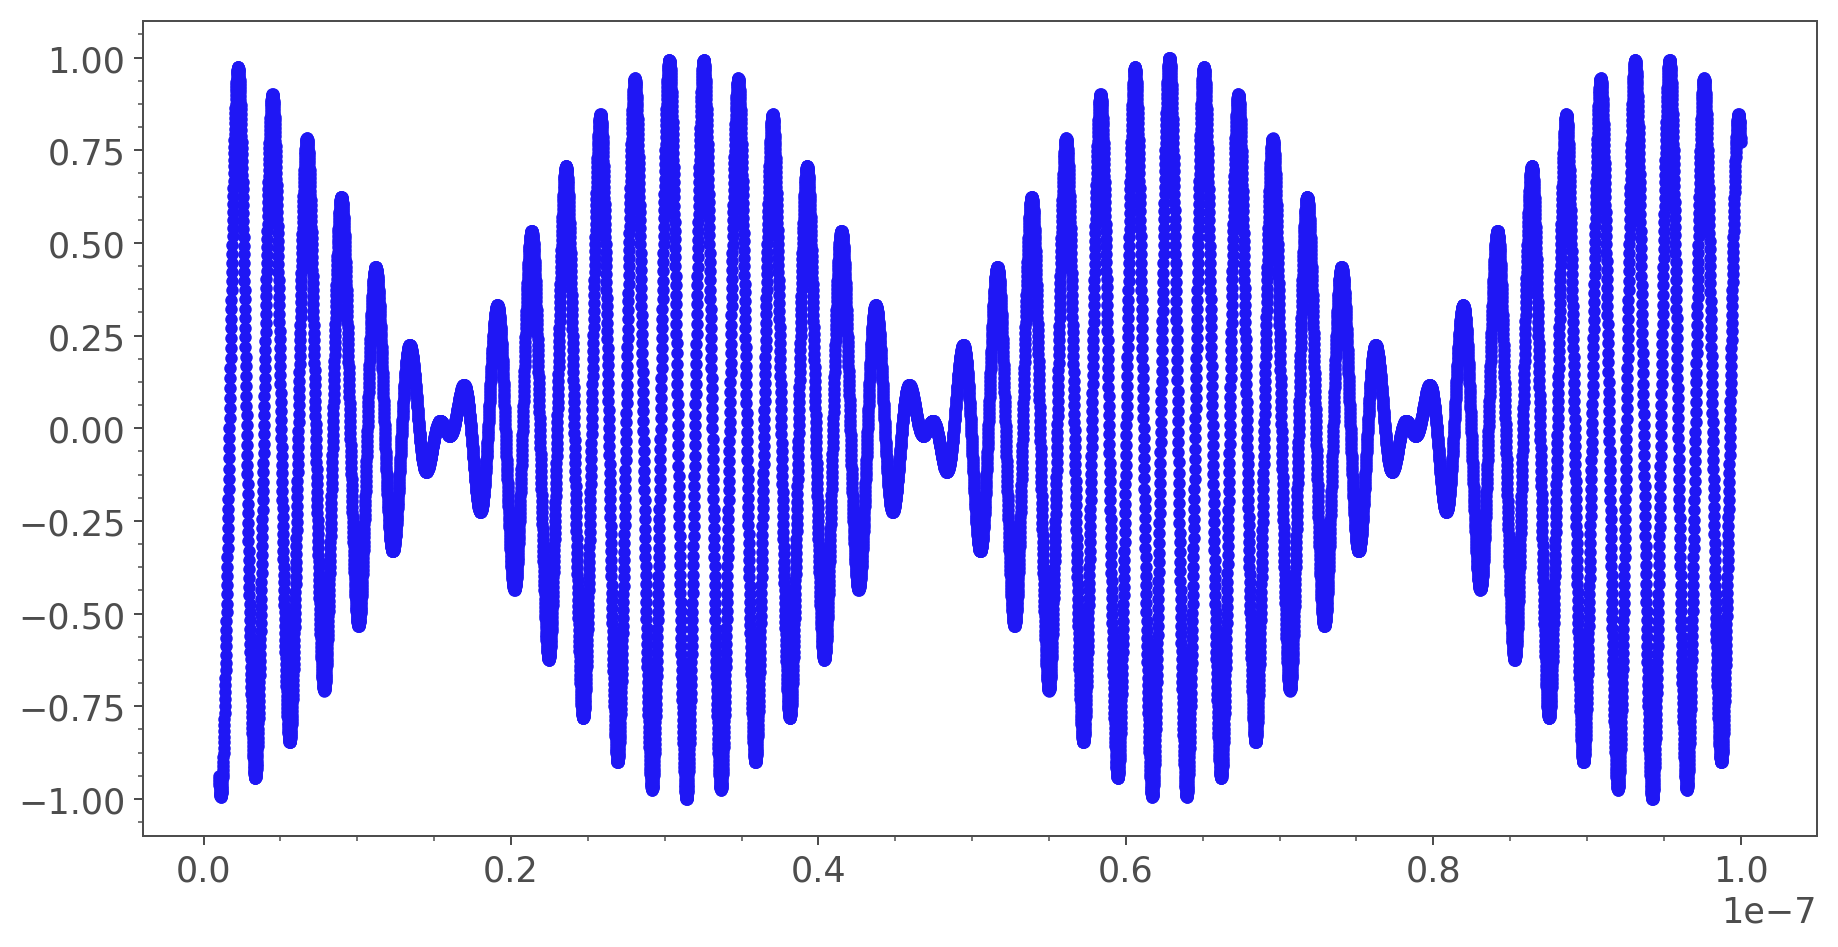

In [220]:
tx = np.linspace(1e-9, 100e-9,10000)
ty = np.cos(2.8e9*tx)*np.cos(0.1e9*tx)

plt.plot(tx[0:10000],ty[0:10000])
plt.show()



In [315]:
# plt.plot(np.fft.fft(ty).real)
# plt.show()

In [314]:
# from scipy.fftpack import fft
# t = np.arange(100000)
# sp1 = np.abs(np.fft.fft(np.sin(1000*t)))
# sp5 = np.abs(np.fft.fft(np.sin(5*t)))
# # sp1 =fft(np.sin(t))
# freq = np.fft.fftfreq(t.shape[-1])
# plt.plot(freq, sp1.real,color='black')#, freq, sp.imag)
# plt.plot(freq, sp5.real,color='red')#, freq, sp.imag)
# plt.show()

In [ ]:
tx = np.linspace(1e-9, 100e-9,10000)
ty = np.cos(2.8e9*tx)*np.cos(0.1e9*tx)

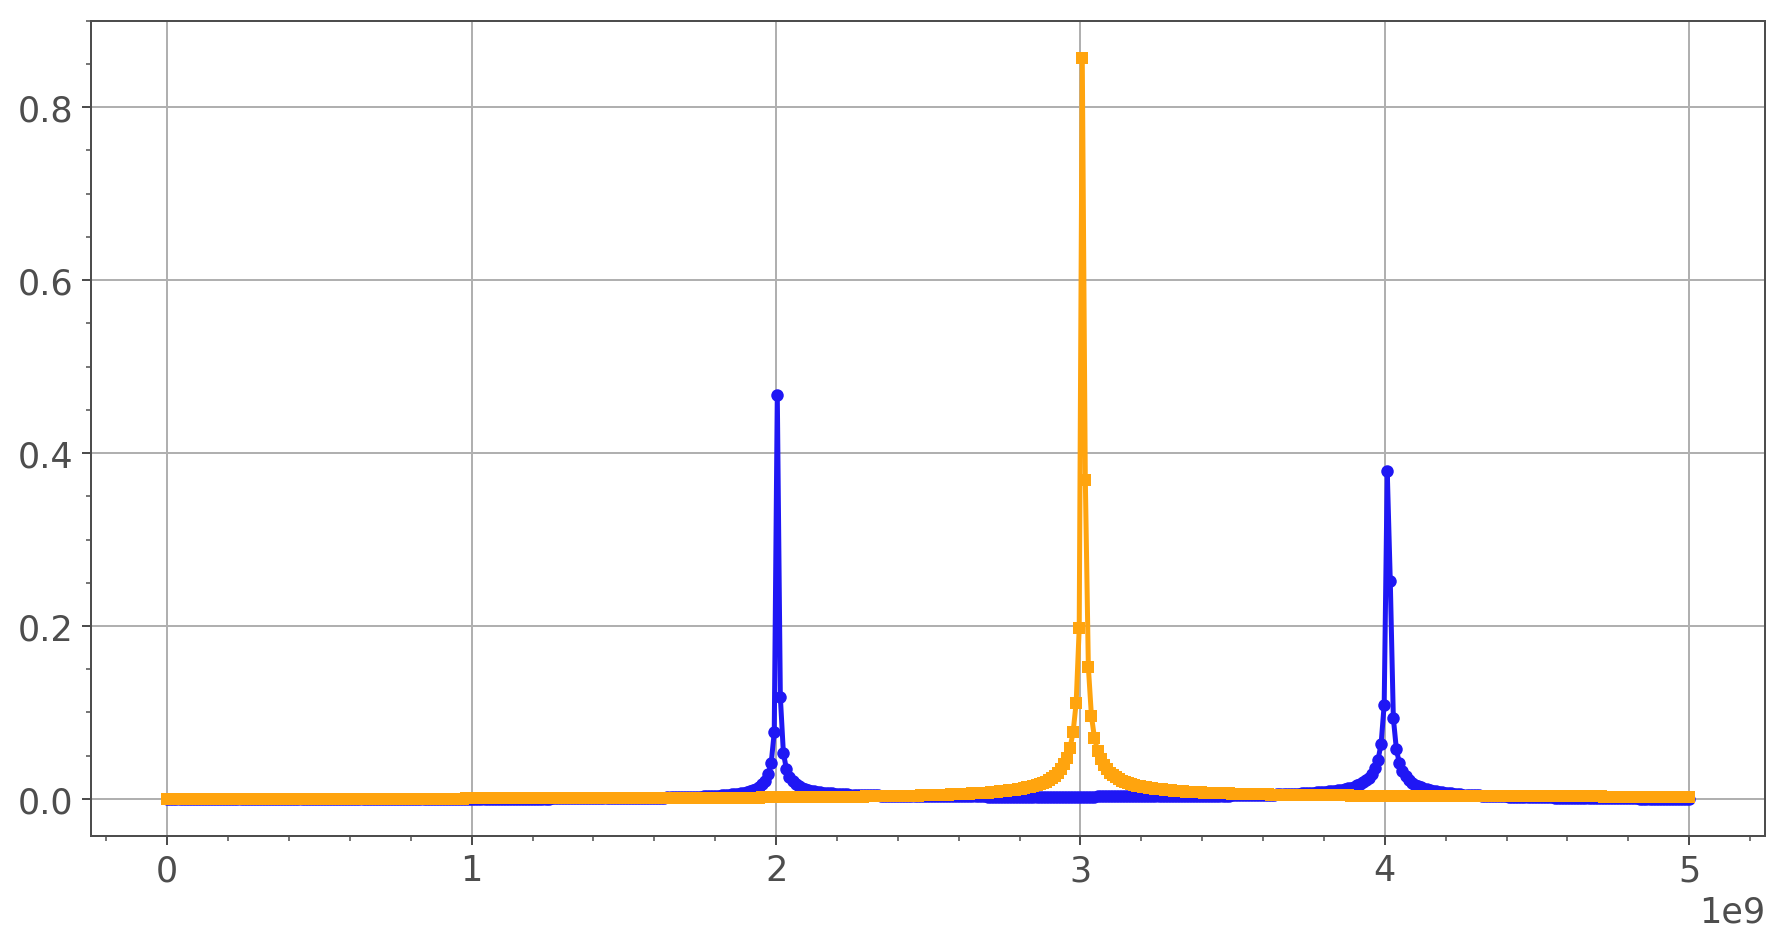

In [320]:
# Number of sample points
N = 1000
# sample spacing
T = 1.0 / 1e10

freq = np.linspace(0.0, N*T, N)

ytemp1 = np.sin(3e9 * 2.0*np.pi*freq) #+ 0.5*np.sin(80.0 * 2.0*np.pi*freq)

ytemp = np.sin(3e9 * 2.0*np.pi*freq) *np.sin(1e9*  2.0*np.pi*freq )

yf = fft(ytemp)
yf1 = fft(ytemp1)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf1[0:N//2]))
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()
plt.show()

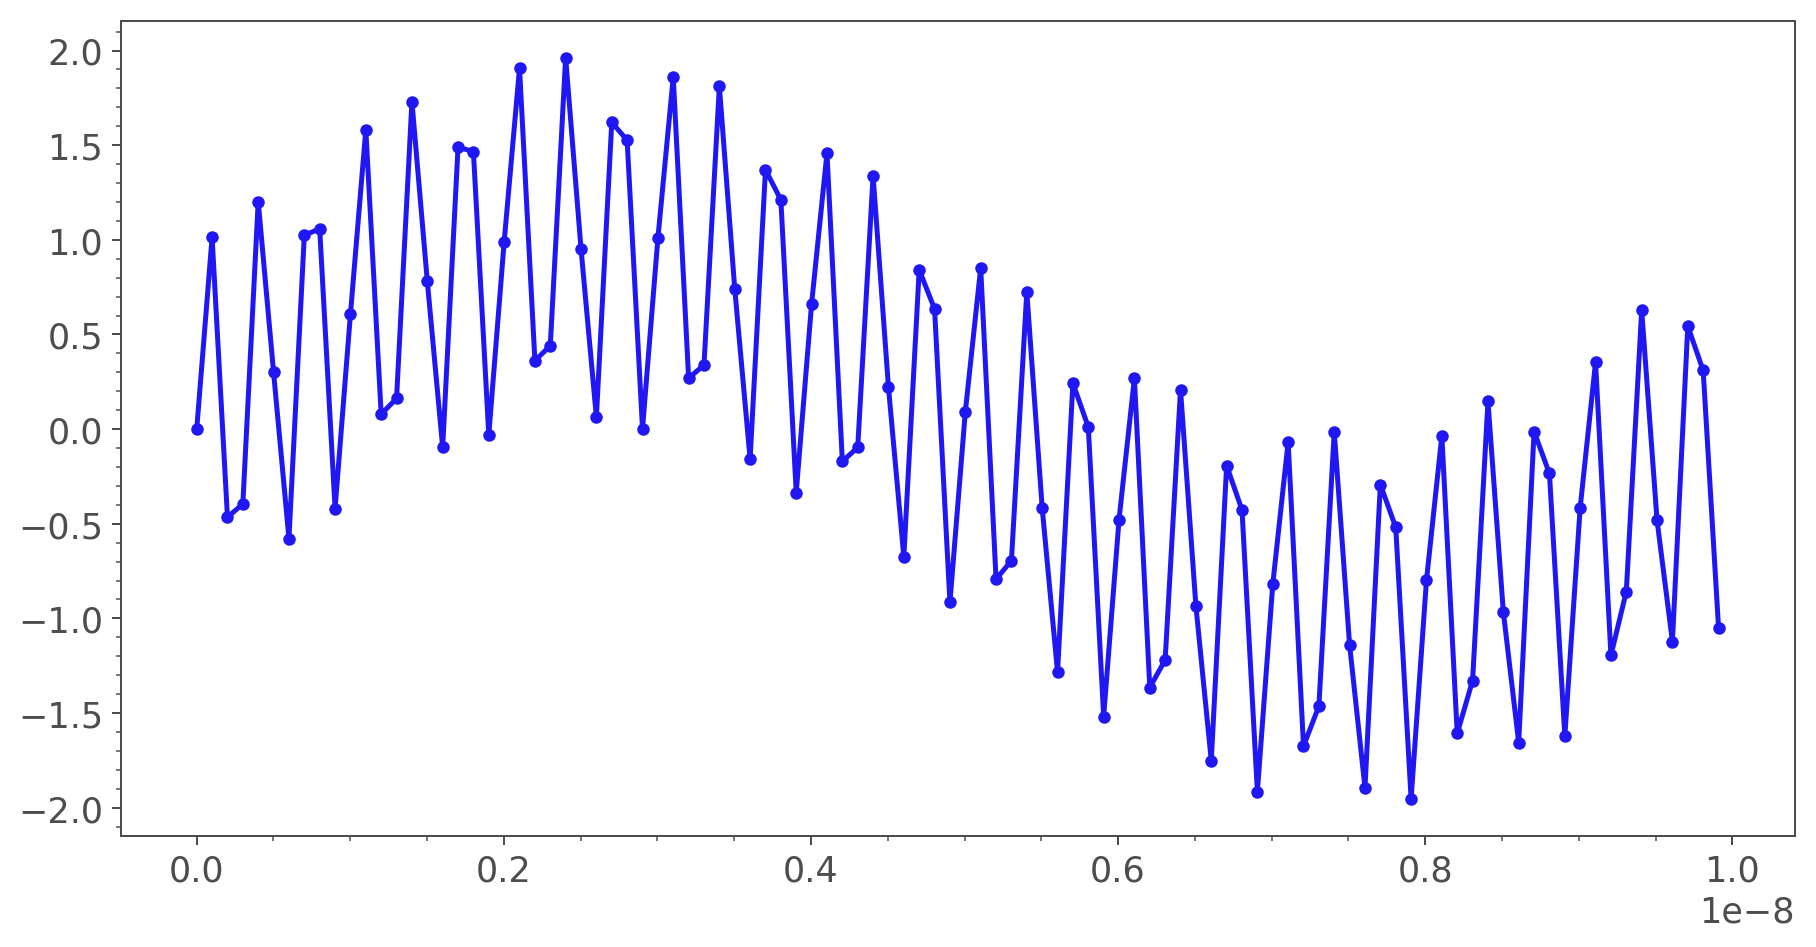

In [322]:
ytemp = np.sin(3e9 * 2.0*np.pi*freq) + np.sin(0.1e9*  2.0*np.pi*freq )

plt.plot(freq[0:100],ytemp[0:100])
plt.show()

In [249]:
freq[0:10]

array([0.        , 0.00125209, 0.00250417, 0.00375626, 0.00500835,
       0.00626043, 0.00751252, 0.00876461, 0.01001669, 0.01126878])

In [250]:
xf[0:10]

array([ 0.        ,  1.33779264,  2.67558528,  4.01337793,  5.35117057,
        6.68896321,  8.02675585,  9.36454849, 10.70234114, 12.04013378])

In [254]:
np.linspace(1e-9, 100e-9,10000)[10]-np.linspace(1e-9, 100e-9,10000)[9]

9.900990099010006e-12

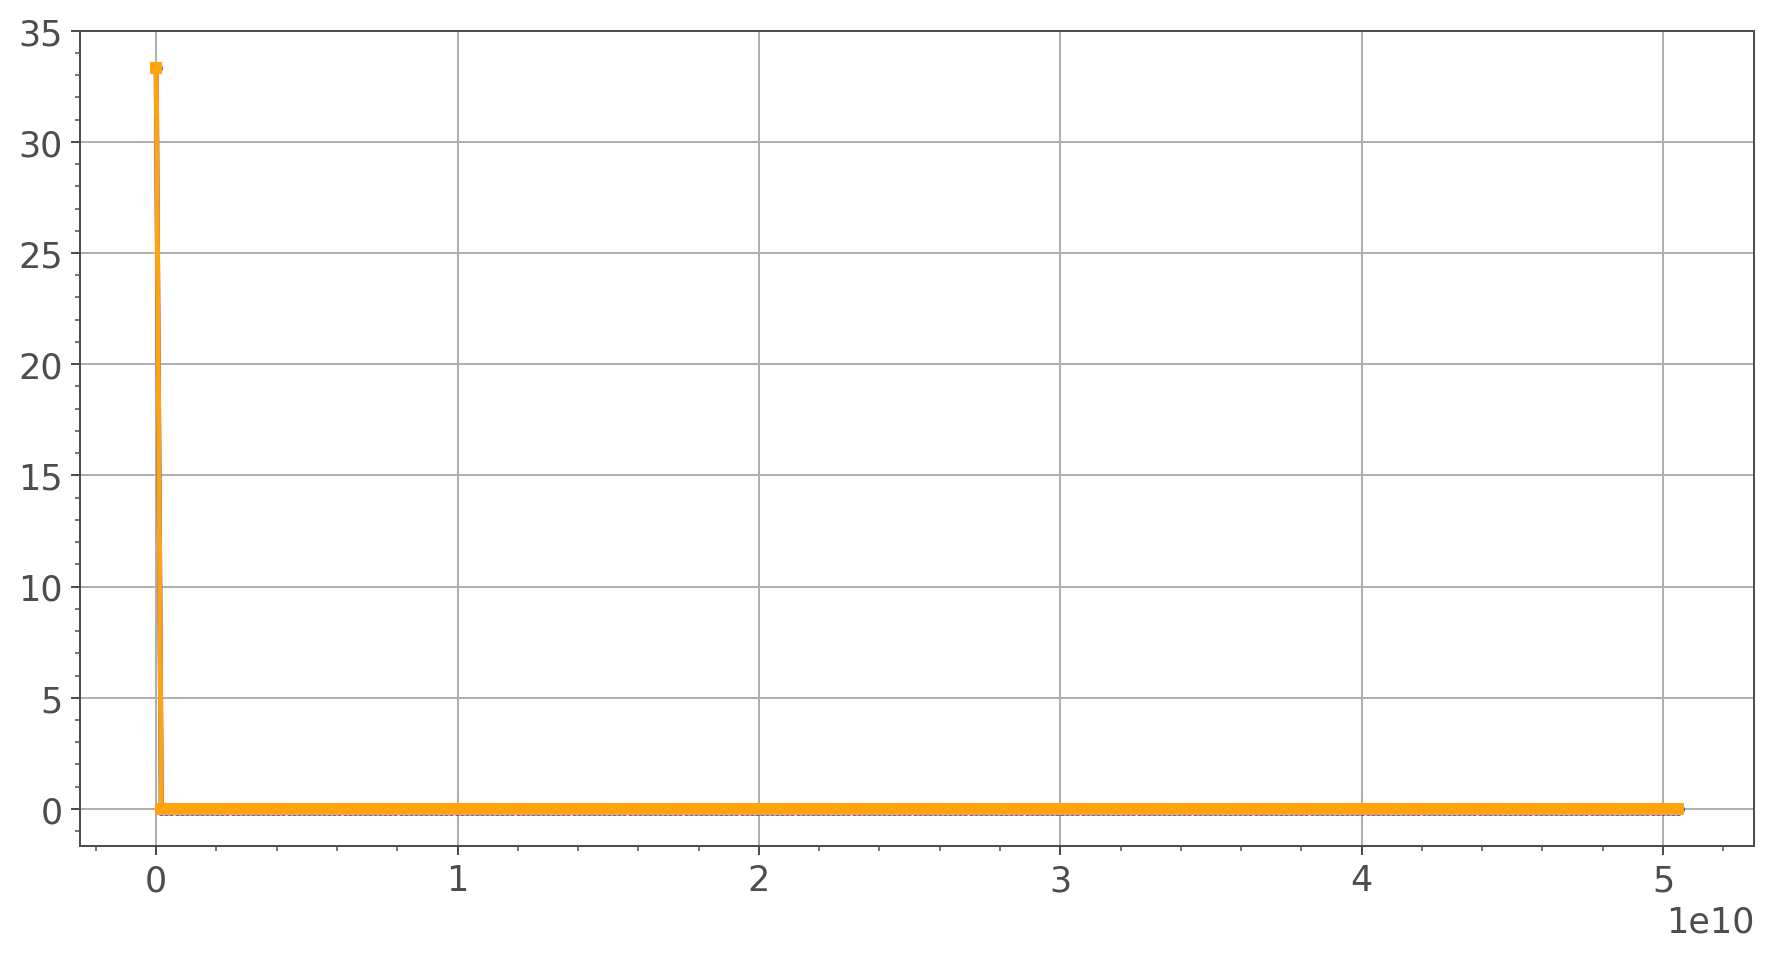

In [255]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0

T = 1e-9
freq = np.linspace(0.0, N*T, N)

# ytemp = np.sin(50.0 * 2.0*np.pi*freq) + 0.5*np.sin(80.0 * 2.0*np.pi*freq)
ytemp = np.cos(2.8e9*tx*2.0*np.pi*freq)*np.cos(0.1e9*tx*2.0*np.pi*freq)

yf = fft(ytemp)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()
plt.show()